In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

### Import filtered Student's file 

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("filtered_df2_A2.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         383 non-null    int64 
 1   gender             383 non-null    int64 
 2   highest_education  383 non-null    object
 3   age_band           383 non-null    object
 4   studied_credits    383 non-null    int64 
 5   final_result       383 non-null    object
 6   tenure_band        383 non-null    object
dtypes: int64(3), object(4)
memory usage: 21.1+ KB


### Encoding categorical data

Using One-Hot Encoding

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])

In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
    'tenure_band_0-5',
    'tenure_band_11-15',
    'tenure_band_16 or more',
    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [7]:
#data_df_encoded.info()

### Algorithm 3 - Support Vector Machine (SVM) 

#### https://scikit-learn.org/stable/modules/svm.html

In [33]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA


In [21]:
# divide the dataset into features (X) and the target variable (y)

X = data_df_encoded.drop(columns=['studied_credits'])  # Replace 'target_variable' with the name of your target variable column

y = data_df_encoded['studied_credits']

In [22]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# feature scaling (recommended for SVM)

scaler = StandardScaler()

In [24]:
# scale x dataframes - test and train

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# create the SVM model
# kernels to try ... 'linear', 'rbf' (default), 'poly', 'sigmoid', 'callable'/''

svm_model = SVC(kernel='rbf')  

In [26]:
# train the SVM model on the scaled training data

svm_model.fit(X_train_scaled, y_train)

SVC()

In [27]:
# make predictions on the scaled test data

y_pred = svm_model.predict(X_test_scaled)

In [28]:
# calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7012987012987013


In [29]:
# generate a classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          60       0.70      1.00      0.82        54
          90       0.00      0.00      0.00         2
         120       0.00      0.00      0.00        16
         150       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         3
         300       0.00      0.00      0.00         1

    accuracy                           0.70        77
   macro avg       0.12      0.17      0.14        77
weighted avg       0.49      0.70      0.58        77



C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# generate the confusion matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[54  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [16  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 1  0  0  0  0  0]]


#### Plotting the GridSearchCV

In [53]:
# plot the results of the svm
# Perform PCA to reduce the features to 2 dimensions for visualization

pca = PCA(n_components=2)

# compresss
X_train_pca = pca.fit_transform(X_train_scaled)

In [54]:
# get unique classes in the target variable

unique_classes = np.unique(y_train)

In [55]:
# generate a colormap for each class

cmap = plt.cm.get_cmap('tab10', len(unique_classes))

ValueError: X has 2 features, but SVC is expecting 17 features as input.

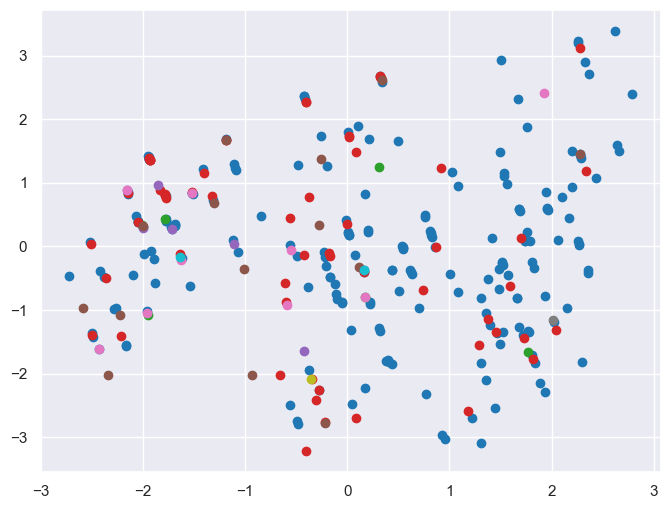

In [57]:
# plot the data points 

plt.figure(figsize=(8, 6))
for i, target_class in enumerate(unique_classes):
    plt.scatter(X_train_pca[y_train == target_class, 0], X_train_pca[y_train == target_class, 1],
                color=cmap(i), label=str(target_class))

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('SVM Decision Boundary Visualization')
plt.show()

#### References

1. https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
2. 